## 🎧 Spotify Music Tracks - Exploratory Data Analysis 

---
## Overview
Exploratory Data Analysis (EDA) helps us dive deep into the dataset, uncovering the hidden structures, patterns, and relationships. In this project, we’ll explore Spotify tracks, focusing on their characteristics and examining how different audio features might influence popularity.

With this exploration, we'll dive deep into what makes a song popular and how different musical elements influence listener preferences. Time to hit play and start our analysis! 🎵


### 🎶 EDA Objectives
Here's what we aim to achieve through this analysis:

#### 1. 📊 **Data Distribution Insight:**
   We'll study the distribution of individual features to understand the spread of data, spot any outliers, and assess potential missing or anomalous values.

#### 2. 🔗 **Exploring Feature Relationships:**
   Investigating how different variables interact with one another, particularly focusing on how audio features may correlate with track popularity.

#### 3. 🎯 **Trends & Patterns Discovery:**
   By looking at trends in the data, we aim to reveal what audio characteristics are commonly found in popular songs. Can we identify what makes a hit track?

#### 4. 🧹 **Data Cleaning & Preparation:**
   Ensuring the dataset is tidy and usable by addressing any issues like missing data, duplicates, or inconsistencies.

#### 🗂️ Dataset Features

The dataset comes with the following attributes:

| Feature                          | Type             | Description                                                      |
|-----------------------------------|------------------|------------------------------------------------------------------|
| `track_id`                        | Object           | Unique ID assigned to each track                                 |
| `track_name`                      | Object           | Name of the track                                                |
| `artist_name`                     | Object           | Name of the performing artist                                    |
| `album_name`                      | Object           | Name of the album containing the track                           |
| `popularity`                      | Numeric          | Track's popularity score (ranging from 0 to 100)                 |
| `danceability`                    | Numeric          | Measure of how danceable the track is (0 to 1)                   |
| `energy`                          | Numeric          | Measure of the track's intensity and power (0 to 1)              |
| `loudness`                        | Numeric          | Average loudness of the track (in dB)                            |
| `tempo`                           | Numeric          | Tempo of the track in beats per minute (BPM)                     |
| `duration_ms`                     | Numeric          | Track length in milliseconds                                     |
| `acousticness`                    | Numeric          | Likelihood of the track being acoustic (0 to 1)                  |
| `instrumentalness`                | Numeric          | Probability of the track being instrumental (0 to 1)             |
| `liveness`                        | Numeric          | Likelihood of a live performance feel (0 to 1)                   |
| `valence`                         | Numeric          | Musical positivity of the track (0 to 1)                         |
| `key`                             | Numeric          | Musical key the track is in (C, D, E, etc.)                      |
| `mode`                            | Numeric          | Modality of the track (Major=1, Minor=0)                         |




---

### 🎶 libraries & Data Loading

In this section, we will load the Grammy Awards dataset and carry out an initial exploration to familiarize ourselves with its structure and content. This step will involve examining the key features, checking for missing values, and understanding the basic statistical properties of the data. 

In [8]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

import pandas as pd
import seaborn as sns
from math import ceil
import matplotlib.pyplot as plt

 
df_spotify = pd.read_csv('../data/spotify_dataset.csv')

In [9]:
print("\n📊 Dataset Info:")
df_spotify.info()


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liv

- There are 114,000 entries and 21 columns.
- Most columns are numeric (int64 and float64), with some categorical (object) and one boolean (bool).

In [11]:
print("🔍 First five rows of the dataset:")
df_spotify.head()

🔍 First five rows of the dataset:


,id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [12]:
print("\n🔍 Number of Duplicate track_id entries:")
print(df_spotify.duplicated(subset='track_id').sum())



🔍 Number of Duplicate track_id entries:
24259


In [15]:
df_spotify.drop_duplicates(subset='track_id', keep='first', inplace=True)

print("\n✅ Checking if there are missing values After Dropping:")
print(df_spotify.isnull().sum())




✅ Checking if there are missing values After Dropping:
id                  0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [16]:

print("\n📊 Cleaned of duplicates track_id:")
df_spotify.info()


📊 Cleaned of duplicates track_id:
<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89740 non-null  int64  
 6   duration_ms       89740 non-null  int64  
 7   explicit          89740 non-null  bool   
 8   danceability      89740 non-null  float64
 9   energy            89740 non-null  float64
 10  key               89740 non-null  int64  
 11  loudness          89740 non-null  float64
 12  mode              89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  acousticness      89740 non-null  float64
 15  instrumentalness  89740 non-null  float64
 16  liveness 

In [14]:
df_spotify.describe()

,id,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


**1. Popularity:**

* **Range:** Popularity scores range from 0 to 100, which aligns with the description.
* **Average:** The average popularity is around 33, which might indicate that a large portion of the tracks are not hugely popular.
* **Distribution:**  The 50th percentile (median) is 35, which is slightly higher than the mean, suggesting a slightly skewed distribution.  

**2. Duration:** 

* **Range:**  Track durations range from 0 milliseconds (likely errors or very short clips) to over 5 million milliseconds (over 80 minutes).
* **Average:** The average duration is around 228,000 milliseconds (about 3.8 minutes).
* **Outliers:** The maximum duration suggests that there might be some very long tracks, which could be podcasts, classical pieces, or other non-standard song formats.

**3. Audio Features:**

* **Danceability, Energy, Acousticness, etc.:**  All these features have values between 0 and 1, as expected. 
* **Loudness:**  Loudness is measured in decibels (dB) and ranges from -49.5 dB to 4.5 dB.  Lower values indicate quieter tracks, while higher values indicate louder tracks.
* **Tempo:** Tempo is measured in beats per minute (BPM) and has a wide range (0 to 243 BPM), reflecting the diverse tempos of different music genres.

There is one song that doesnt have the information of three columns so we are going to delete it

In [18]:
df_spotify.dropna(inplace=True)

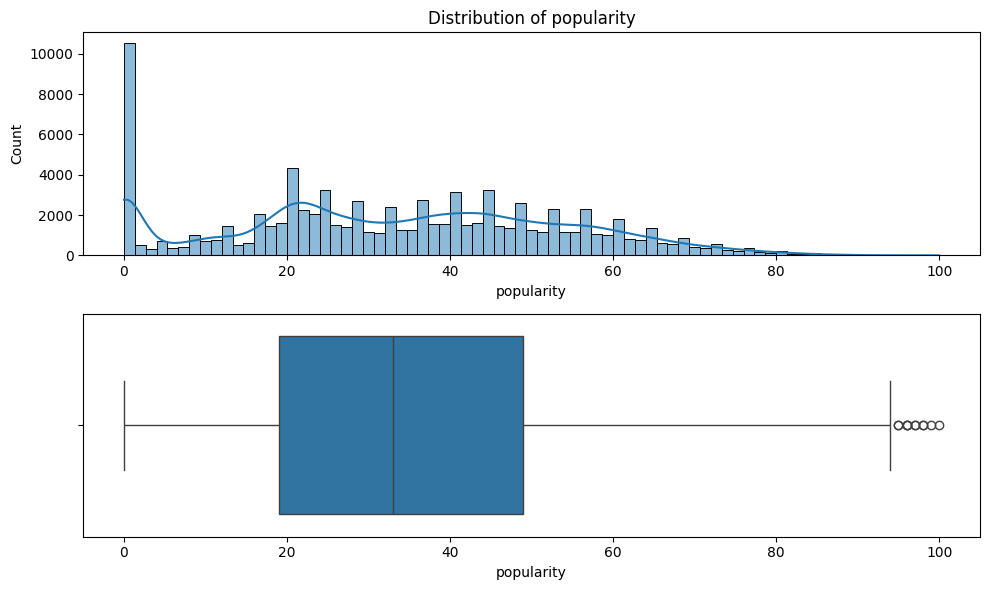

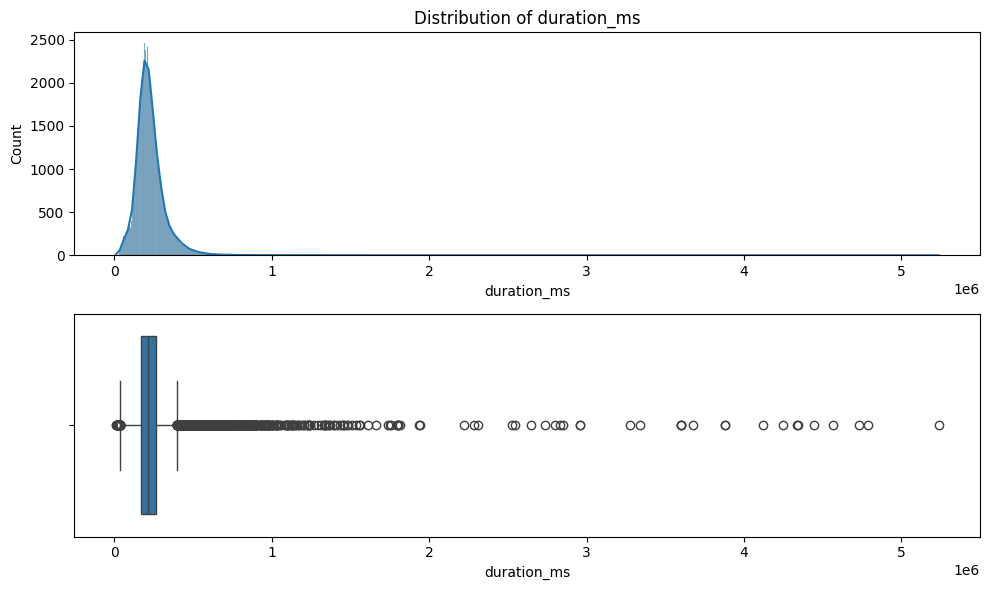

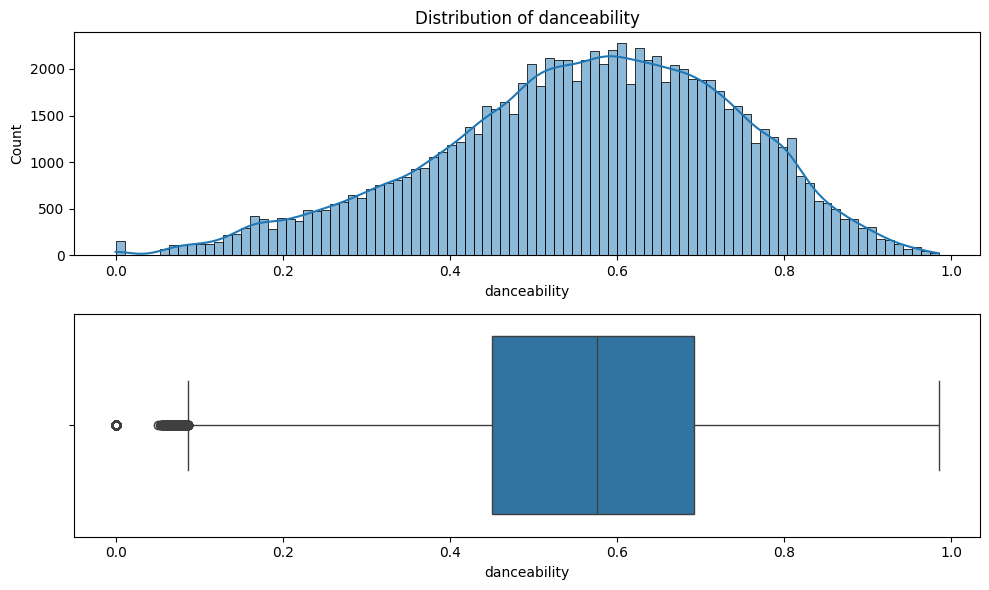

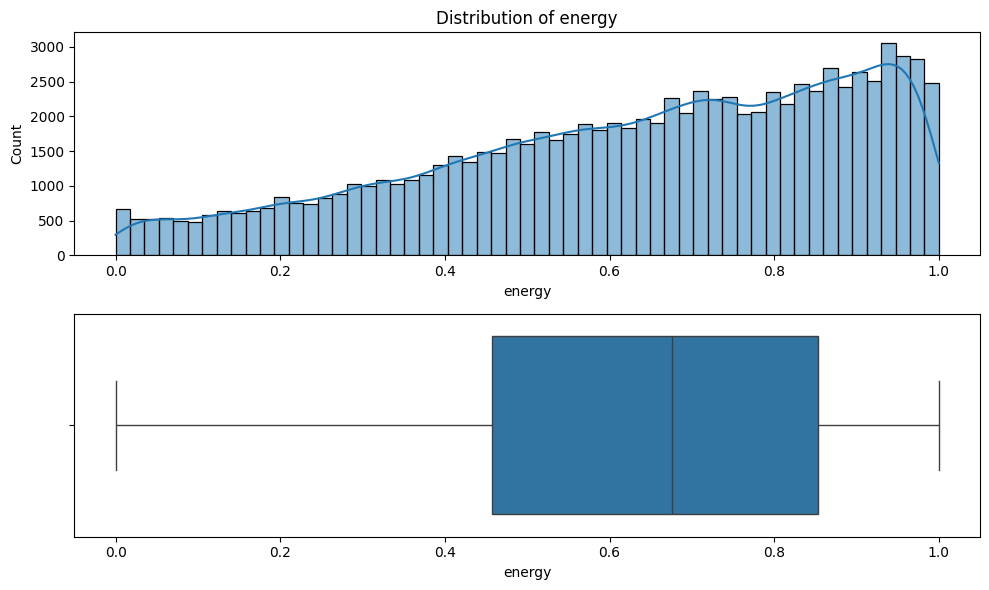

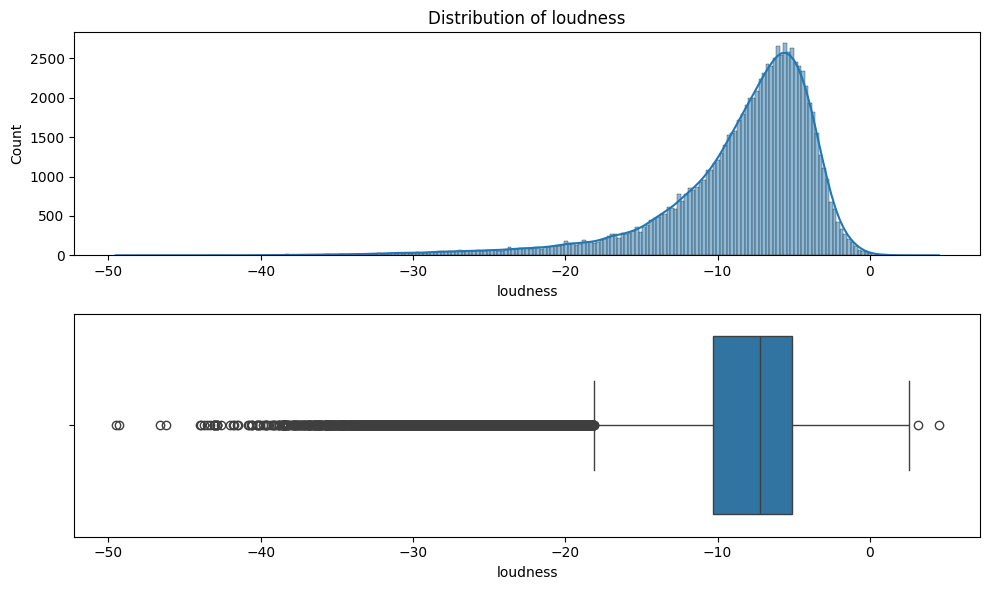

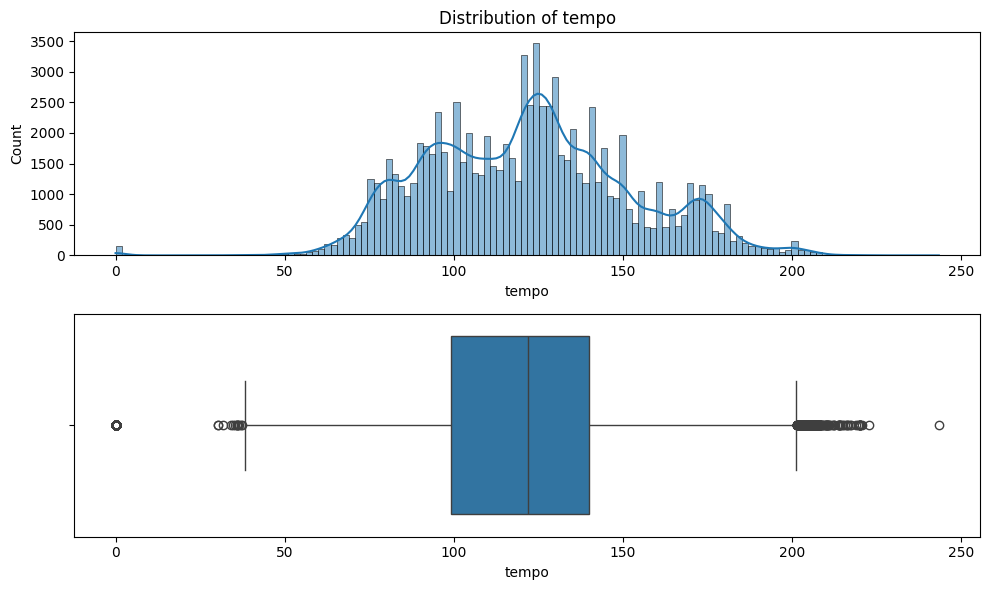

In [20]:
features_to_plot = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'tempo']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))  

    # Histogram
    plt.subplot(2, 1, 1)  
    sns.histplot(df_spotify[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    # Box Plot
    plt.subplot(2, 1, 2)
    sns.boxplot(x=df_spotify[feature])
    
    plt.tight_layout()  
    plt.show()

**Histogram popularity:**

* **Right Skewed:** The histogram shows a right-skewed distribution, meaning there are more tracks with lower popularity scores (closer to 0) and fewer tracks with higher popularity scores (closer to 100). 
* **Peaks:**  There are noticeable peaks in the distribution around popularity scores of 0 and 20. This suggests that a large number of tracks have very low popularity, possibly new releases or tracks from lesser-known artists. 
* **Gradual Decline:** The number of tracks gradually declines as the popularity score increases.

**Box Plot popularity:**

* **Median and Quartiles:** The box plot confirms the right skew, with the median closer to the first quartile. This indicates that 50% of the tracks have a popularity score below around 35.
* **Outliers:**  The box plot clearly shows outliers on the higher end of the popularity scale (above 90). These are likely the very popular tracks from well-known artists.

* **Most tracks are not hugely popular:** The majority of the tracks in the dataset have relatively low popularity scores. 
* **A small number of tracks are highly popular:** A small percentage of tracks have significantly higher popularity, driving the right skew. These are likely the chart-topping hits or tracks from very popular artists.


**Interpretation:**

The distribution of `danceability` suggests that:

* **Danceability is a Common Feature:** It seems that a large proportion of the tracks in the dataset are considered danceable, with a peak in the distribution around 0.6.
* **Most Tracks Have Moderate to High Danceability:** The median and the peak of the distribution both indicate that most of the tracks are moderately to highly danceable.
* **Few Tracks Are Highly Un-Danceable:** The outlier on the lower end of the scale suggests that there are very few tracks that are considered highly un-danceable, which is understandable.

The distribution of `energy` suggests:

* **High Energy Tracks are Common:**  Most tracks have a moderate to high energy level, with a peak in the distribution closer to 0.8.  This indicates that the data is skewed towards tracks that are perceived as being intense, fast, and loud.
* **Few Tracks Are Very Low Energy:** The absence of outliers on the lower end of the scale suggests that there are very few tracks with extremely low energy levels, which makes sense considering that most popular music is energetic.

**Observations of duration:**

* **Right Skew:** The histogram shows a very strong right skew.  Most tracks have a shorter duration, and there are a few tracks with much longer durations.
* **Peak:** The peak of the distribution is around 200,000 milliseconds, suggesting that a lot of the tracks are roughly 3 minutes long.
* **Outliers:** The box plot clearly shows that there are many outliers on the right side (longer durations). These outliers might represent podcasts, spoken-word tracks, or perhaps classical music pieces.


In [26]:
print(df_spotify['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [27]:
pop_genres = [
    'pop', 'pop-film', 'indie-pop', 'power-pop', 'synth-pop', 'j-pop', 'k-pop', 'cantopop'
]
rock_genres = [
    'rock', 'alt-rock', 'punk-rock', 'psych-rock', 'j-rock', 'grunge', 'hard-rock', 'metalcore', 'rock-n-roll', 'rockabilly'
]
rnb_genres = [
    'r-n-b', 'soul', 'funk', 'disco', 'dancehall' 
]
country_genres = [
    'country', 'honky-tonk', 'bluegrass' 
]
hiphop_genres = [
    'hip-hop', 'rap', 'reggaeton'
]
electronic_genres = [
    'electronic', 'edm', 'dance', 'house', 'techno', 'trance', 'dubstep', 'deep-house', 
    'electro', 'drum-and-bass', 'hardstyle', 'breakbeat', 'chicago-house', 'detroit-techno', 
    'minimal-techno', 'progressive-house', 'trip-hop'
]
latin_genres = [
    'latin', 'latino', 'salsa', 'samba', 'tango', 'reggaeton', 'merengue', 'pagode', 'sertanejo'
]
folk_genres = [
    'folk', 'singer-songwriter', 'americana', 'bluegrass' 
]
other_genres = [
    'acoustic', 'afrobeat', 'ambient', 'anime', 'black-metal', 'blues', 'brazil', 'british', 
    'children', 'chill', 'classical', 'club', 'comedy', 'death-metal', 'disney', 
    'dub', 'emo', 'forro', 'french', 'garage', 'german', 'gospel', 'goth', 'grindcore', 
    'groove', 'guitar', 'happy', 'hardcore', 'heavy-metal', 'indian', 'industrial', 
    'iranian', 'j-dance', 'j-idol', 'jazz', 'kids', 'malay', 'mandopop', 'metal', 
    'mpb', 'new-age', 'opera', 'party', 'piano', 'punk', 'reggae', 'romance', 
    'sad', 'ska', 'sleep', 'spanish', 'study', 'swedish', 'tango', 'turkish', 
    'world-music', 'show-tunes'
]

def assign_genre_group(category):
    if category in pop_genres:
        return "Pop"
    elif category in rock_genres:
        return "Rock"
    elif category in rnb_genres:
        return "R&B"
    elif category in country_genres:
        return "Country"
    elif category in hiphop_genres:
        return "Hip-Hop/Rap"
    elif category in electronic_genres:
        return "Electronic"
    elif category in latin_genres:
        return "Latin"
    elif category in folk_genres:
        return "Folk/Americana"
    elif category in other_genres:
        return "Other"
    else:
        return "Unknown" 

df_spotify['genre_group'] = df_spotify['track_genre'].apply(assign_genre_group)


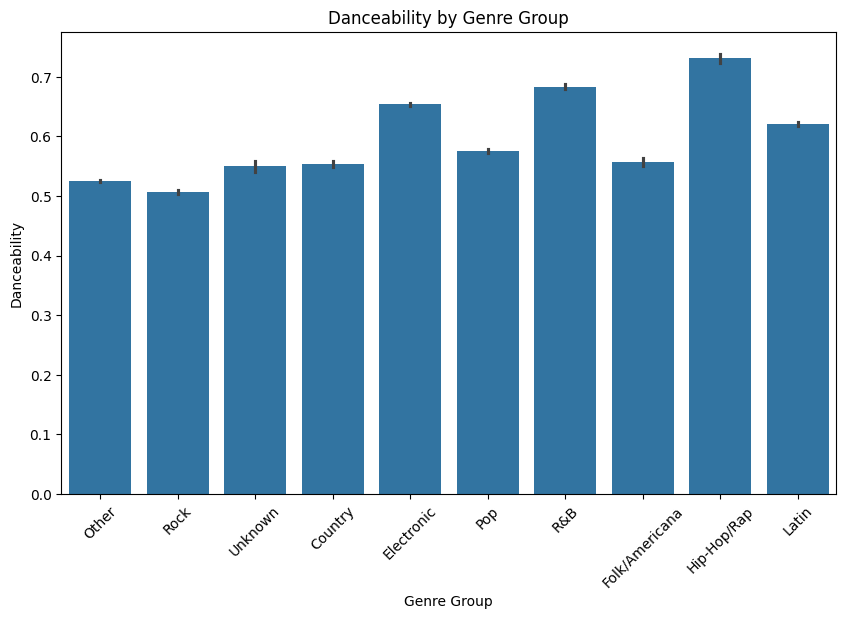

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre_group', y='danceability', data=df_spotify)
plt.title('Danceability by Genre Group')
plt.xlabel('Genre Group')
plt.ylabel('Danceability')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

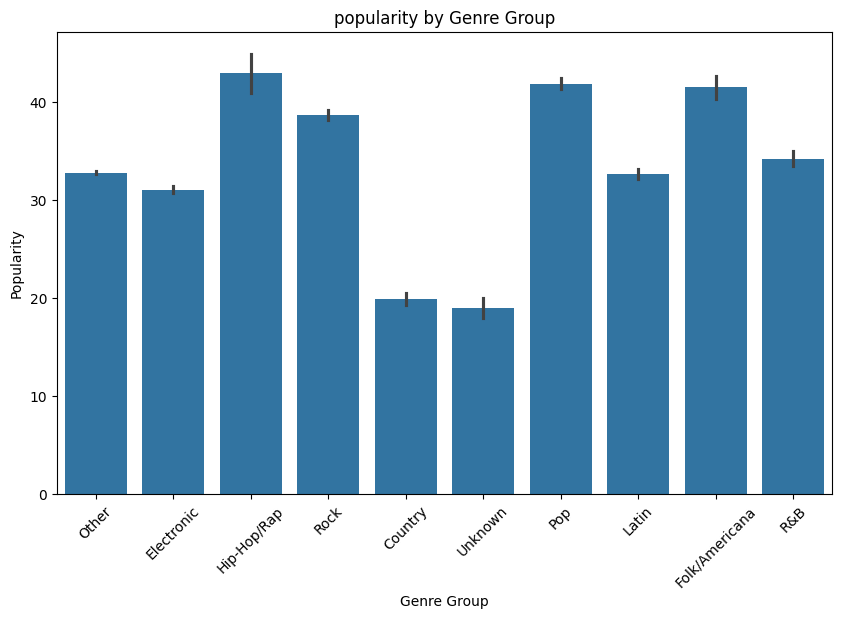

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre_group', y='popularity', data=df_spotify)
plt.title('popularity by Genre Group')
plt.xlabel('Genre Group')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

This code first sorts the DataFrame by `track_id` and then by `popularity` (in descending order). Then, it removes duplicates based on `track_id` and `artists`, keeping only the row with the highest popularity score for each unique track-artist combination.

In [31]:
df_spotify = df_spotify.sort_values(by=['track_id', 'popularity'], ascending=[True, False])
df_spotify.drop_duplicates(subset=['track_id', 'artists'], keep='first', inplace=True)


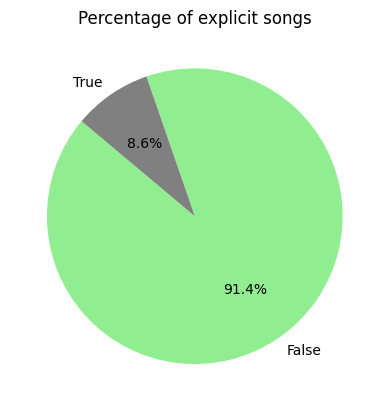

In [32]:
counts = df_spotify['explicit'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'gray'])
plt.title('Percentage of explicit songs')
plt.show()

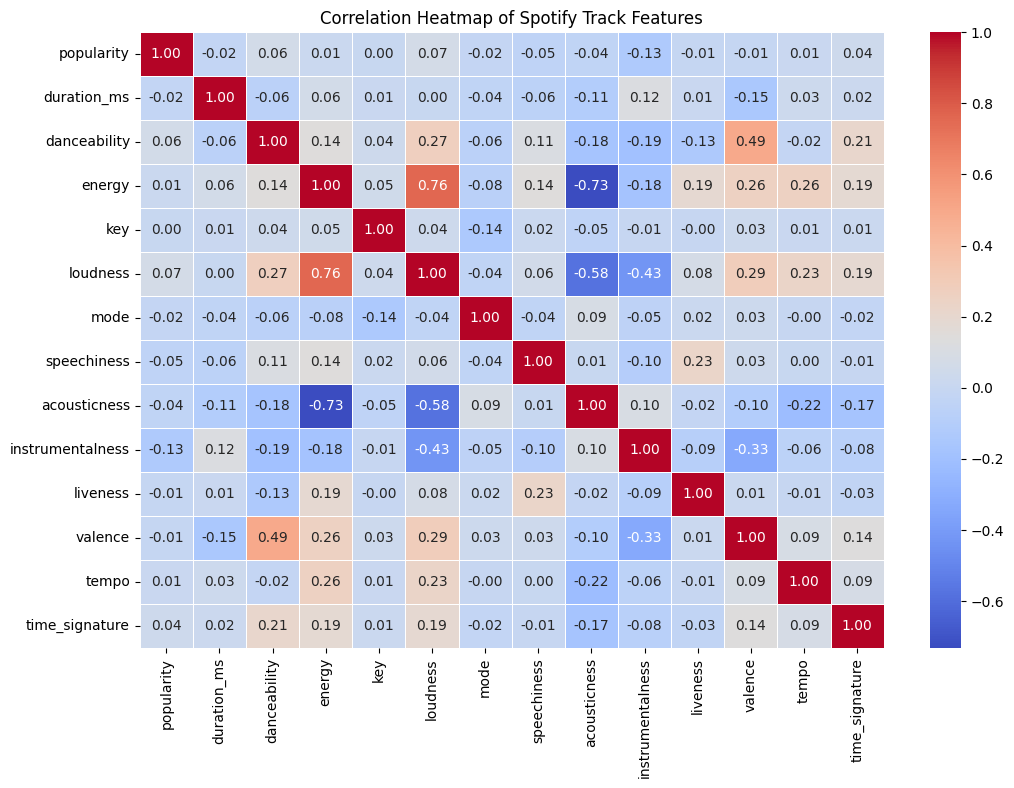

In [36]:
numerical_cols = df_spotify.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Spotify Track Features')
plt.show()


* **Strong Positive Correlations:**
    * **Energy & Loudness (0.76):** This is expected, as loud tracks are typically perceived as having higher energy.
    * **Danceability & Energy (0.14):**  It seems that danceable tracks tend to have higher energy levels.
    * **Speechiness & Mode (0.14):**  There is a moderate positive correlation between speechiness and major key.
* **Strong Negative Correlations:**
    * **Acousticness & Energy (-0.73):** This also makes intuitive sense.  Acoustic tracks tend to have lower energy levels compared to electronic or rock tracks.
    * **Instrumentalness & Loudness (-0.43):**  Instrumental tracks tend to be less loud. 
    * **Instrumentalness & Liveness (-0.33):** There is a moderate negative correlation between instrumentality and liveness. This makes sense, as live performances often involve vocals.
* **Moderate Correlations:**
    * **Danceability & Popularity (0.49):** This suggests a moderate positive relationship between danceability and popularity. 
    * **Loudness & Valence (0.29):**  There's a moderate positive correlation between loudness and positive valence (e.g., happy, cheerful).
